<a href="https://colab.research.google.com/github/isys5002-itp/ISYS5002-2024-S2/blob/main/09_02_simple_dashboard_module08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook, we will work with

* sqlite database
* database itme into pandas dataframe
* visualisation
* Colab forms

## Import libraries and establish database connection

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
connection = sqlite3.connect('superheroes.db')
cursor = connection.cursor() #something like 'row' returned from a table

In [3]:
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()

[('your_table',), ('superheroes',)]

In [4]:
sql='''
PRAGMA table_info('your_table');
'''
cursor.execute(sql)
cursor.fetchall()

[(0, 'id', 'INTEGER', 0, None, 0),
 (1, 'last_name', 'TEXT', 0, None, 0),
 (2, 'first_name', 'TEXT', 0, None, 0),
 (3, 'superhero', 'TEXT', 0, None, 0),
 (4, 'gender', 'TEXT', 0, None, 0),
 (5, 'alignment', 'TEXT', 0, None, 0)]

In [6]:
sql = '''
SELECT * FROM your_table;
'''
cursor.execute(sql)
all_results = cursor.fetchall()
(all_results)

[(1, 'Kent', 'Clark', 'Superman', 'Male', 'Good'),
 (2, 'Prince', 'Diana', 'Wonder Woman', 'Female', 'Good'),
 (3, 'Wayne', 'Bruce', 'Batman', 'Male', 'Good'),
 (4, 'Curry', 'Arthur', 'Aquaman', 'Male', 'Good'),
 (5, 'Maximoff', 'Wanda', 'Scarlet Witch', 'Female', 'Good'),
 (6, 'Brolin', 'Josh', 'Thanos', 'Male', 'Evil'),
 (7, 'Napier', 'Joker', 'Joker', 'Male', 'Evil'),
 (8, 'Uxas', 'Darkseid', 'Darkseid', 'Male', 'Evil'),
 (9, 'Parker', 'Peter', 'Spider-Man', 'Male', 'Good'),
 (10, 'Goblin', 'Green', 'Green Goblin', 'Male', 'Evil'),
 (11, 'Skull', 'Red', 'Red Skull', 'Male', 'Evil'),
 (12, 'Kasady', 'Carnage', 'Carnage', 'Male', 'Evil'),
 (13, 'Stark', 'Tony', 'Iron Man', 'Male', 'Good'),
 (14, 'Quinzel', 'Harley', 'Harley Quinn', 'Female', 'Evil'),
 (15, 'Kyle', 'Selina', 'Catwoman', 'Female', 'Evil'),
 (16, 'Darkholme', 'Mystique', 'Mystique', 'Female', 'Evil'),
 (17, 'Allen', 'Barry', 'The Flash', 'Male', 'Good'),
 (18, 'Ivy', 'Poison', 'Poison Ivy', 'Female', 'Evil'),
 (19, 'Moon

In [5]:
sql='''
PRAGMA table_info('superheroes');
'''
cursor.execute(sql)
cursor.fetchall()

[(0, 'id', 'INTEGER', 0, None, 0),
 (1, 'last_name', 'TEXT', 0, None, 0),
 (2, 'first_name', 'TEXT', 0, None, 0),
 (3, 'superhero', 'TEXT', 0, None, 0),
 (4, 'gender', 'TEXT', 0, None, 0),
 (5, 'alignment', 'TEXT', 0, None, 0)]

In [7]:
sql = '''
SELECT * FROM superheroes;
'''
cursor.execute(sql)
all_results = cursor.fetchall()
(all_results)

[(1, 'Kent', 'Clark', 'Superman', 'Male', 'Good'),
 (2, 'Prince', 'Diana', 'Wonder Woman', 'Female', 'Good'),
 (3, 'Wayne', 'Bruce', 'Batman', 'Male', 'Good'),
 (4, 'Curry', 'Arthur', 'Aquaman', 'Male', 'Good'),
 (5, 'Maximoff', 'Wanda', 'Scarlet Witch', 'Female', 'Good'),
 (6, 'Brolin', 'Josh', 'Thanos', 'Male', 'Evil'),
 (7, 'Napier', 'Joker', 'Joker', 'Male', 'Evil'),
 (8, 'Uxas', 'Darkseid', 'Darkseid', 'Male', 'Evil'),
 (9, 'Parker', 'Peter', 'Spider-Man', 'Male', 'Good'),
 (10, 'Goblin', 'Green', 'Green Goblin', 'Male', 'Evil'),
 (11, 'Skull', 'Red', 'Red Skull', 'Male', 'Evil'),
 (12, 'Kasady', 'Carnage', 'Carnage', 'Male', 'Evil'),
 (13, 'Stark', 'Tony', 'Iron Man', 'Male', 'Good'),
 (14, 'Quinzel', 'Harley', 'Harley Quinn', 'Female', 'Evil'),
 (15, 'Kyle', 'Selina', 'Catwoman', 'Female', 'Evil'),
 (16, 'Darkholme', 'Mystique', 'Mystique', 'Female', 'Evil'),
 (17, 'Allen', 'Barry', 'The Flash', 'Male', 'Good'),
 (18, 'Ivy', 'Poison', 'Poison Ivy', 'Female', 'Evil'),
 (19, 'Moon

## Load the table into Pandas dataframe

In [8]:
sql='''
SELECT * from superheroes;
'''
# Load the data into a DataFrame
superheroes_df = pd.read_sql_query(sql, connection)

df = superheroes_df
df

,id,last_name,first_name,superhero,gender,alignment
0,1,Kent,Clark,Superman,Male,Good
1,2,Prince,Diana,Wonder Woman,Female,Good
2,3,Wayne,Bruce,Batman,Male,Good
3,4,Curry,Arthur,Aquaman,Male,Good
4,5,Maximoff,Wanda,Scarlet Witch,Female,Good
5,6,Brolin,Josh,Thanos,Male,Evil
6,7,Napier,Joker,Joker,Male,Evil
7,8,Uxas,Darkseid,Darkseid,Male,Evil
8,9,Parker,Peter,Spider-Man,Male,Good
9,10,Goblin,Green,Green Goblin,Male,Evil


## Analyse Superheroes' Alignment based on Gender

### Analyse and Visualise - Male superheroes Alignment

In [9]:
# Filter data for male superheroes
male_superheroes = df[df['gender'] == 'Male']

male_superheroes

,id,last_name,first_name,superhero,gender,alignment
0,1,Kent,Clark,Superman,Male,Good
2,3,Wayne,Bruce,Batman,Male,Good
3,4,Curry,Arthur,Aquaman,Male,Good
5,6,Brolin,Josh,Thanos,Male,Evil
6,7,Napier,Joker,Joker,Male,Evil
7,8,Uxas,Darkseid,Darkseid,Male,Evil
8,9,Parker,Peter,Spider-Man,Male,Good
9,10,Goblin,Green,Green Goblin,Male,Evil
10,11,Skull,Red,Red Skull,Male,Evil
11,12,Kasady,Carnage,Carnage,Male,Evil


In [10]:
# Get alignment distribution for male superheroes
male_alignment_counts = male_superheroes['alignment'].value_counts()

male_alignment_counts

,count
alignment,
Evil,10
Good,6


In [ ]:
import matplotlib.pyplot as plt

plt.bar(male_alignment_counts.index, male_alignment_counts.values)
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.title('Alignment Distribution for Male Superheroes')
plt.show()

### Task: Analyse and visualise the distribution of alignments for female superheroes

In [ ]:
# Filter data for male superheroes
female_superheroes = df[df['gender'] == 'Female']

# Get alignment distribution for female superheroes
female_alignment_counts = female_superheroes['alignment'].value_counts()

print(female_alignment_counts)

import matplotlib.pyplot as plt

plt.bar(female_alignment_counts.index, female_alignment_counts.values)
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.title('Alignment Distribution for Female Superheroes')
plt.show()

## Using Golab Forms: Alignment Distribution by Superhero Gender

===Female Superheroes Alignment Distribution===
alignment
Evil    5
Good    4
Name: count, dtype: int64


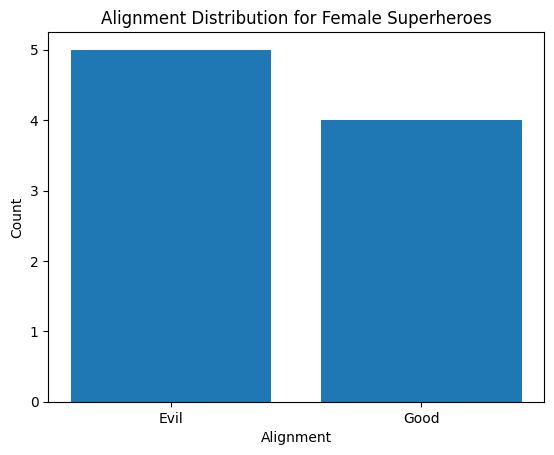

In [22]:
# @title Superheroes Alignment by Gender {"run":"auto"}
Gender = "Female" # @param ["Male","Female"]

if Gender == "Male":
  print("===Male Superheroes Alignment Distribution===")
  # Filter data for male superheroes
  male_superheroes = df[df['gender'] == 'Male']
  # male_superheroes

  # Get alignment distribution for male superheroes
  male_alignment_counts = male_superheroes['alignment'].value_counts()
  print(male_alignment_counts )

  plt.bar(male_alignment_counts.index, male_alignment_counts.values)
  plt.xlabel('Alignment')
  plt.ylabel('Count')
  plt.title('Alignment Distribution for Male Superheroes')
  plt.show()
else:
  print ("===Female Superheroes Alignment Distribution===")

  # Filter data for male superheroes
  female_superheroes = df[df['gender'] == 'Female']

  # Get alignment distribution for female superheroes
  female_alignment_counts = female_superheroes['alignment'].value_counts()

  print(female_alignment_counts)

  import matplotlib.pyplot as plt

  plt.bar(female_alignment_counts.index, female_alignment_counts.values)
  plt.xlabel('Alignment')
  plt.ylabel('Count')
  plt.title('Alignment Distribution for Female Superheroes')
  plt.show()


### Task: Analyse and Visualise using pie chart and google form

### Task: How about giving option for either pie or bar or both charts?